# W10 - October 27 - Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sympy as sym

from scipy import stats
from scipy import optimize

%matplotlib inline

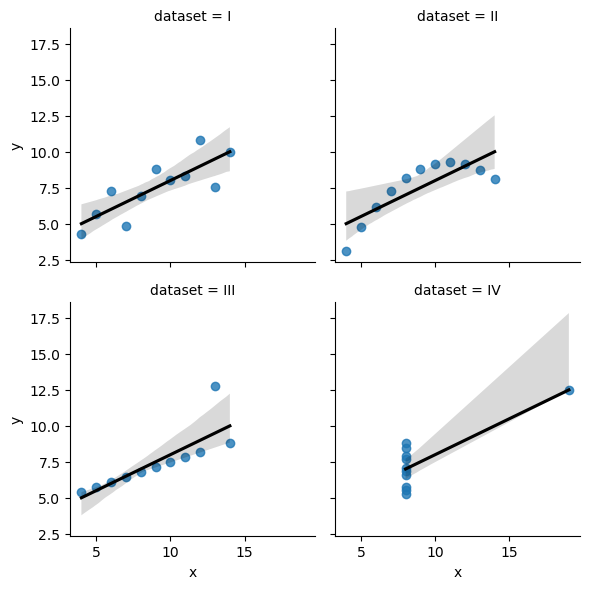

In [2]:
anscombe = sns.load_dataset("anscombe")  # Anscombe's quartet
sns.lmplot(x="x", y="y", data=anscombe,
           col="dataset", col_wrap=2,  # wrap the column variable to multiple rows, each row having 2 columns
           line_kws={"color": "k"}, height=3);

In [3]:
anscombe_1 = anscombe.copy()[anscombe["dataset"] == "I"]
anscombe_1.sort_values(by="x", inplace=True)
x_1 = anscombe_1["x"]
y_1 = anscombe_1["y"]
anscombe_1

,dataset,x,y
7,I,4.0,4.26
10,I,5.0,5.68
6,I,6.0,7.24
9,I,7.0,4.82
1,I,8.0,6.95
3,I,9.0,8.81
0,I,10.0,8.04
4,I,11.0,8.33
8,I,12.0,10.84
2,I,13.0,7.58


**Curve fitting**

(which is a form of non-linear regression)

In [4]:
def linear_func(x, m, c):
    return m*x + c

popt_1, pcov_1 = optimize.curve_fit(linear_func, x_1, y_1, p0=(1, 1))
print(f"Fit: y = {popt_1[0]:.2f} x + {popt_1[1]:.2f}")

Fit: y = 0.50 x + 3.00


## Simple Linear regression

$y = mx + c$

or 

$y = c_0 + c_1 x$

**NumPy**

From HW3 (and the previous class).

In [5]:
# full=True also gives us the sum of squared residuals, as well as other metrics.
fit_result_np = np.polyfit(x_1, y_1, deg=1, full=True)
coeffs = fit_result_np[0]

# Calculating R^2.
sse = fit_result_np[1][0]
y_mean = np.mean(y_1)
sst = np.sum((y_1 - y_mean)**2)
r2 = 1 - (sse / sst)

print(f"Fit: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}    R2: {r2:.4f}")

Fit: y = 0.50x + 3.00    R2: 0.6665


$$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

![Regression errors](https://365datascience.com/resources/blog/2018-11-image8-5-1024x495.jpg)

Source: https://365datascience.com/tutorials/statistics-tutorials/sum-squares/

**SciPy**

In [6]:
fit_result = stats.linregress(x_1, y_1)
fit_result

LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909076, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408, intercept_stderr=1.1247467908086437)

The `pvalue` is important, as linear regression is basically a hypothesis test for whether each coefficient is zero.


In [7]:
print(f"Fit: y = {fit_result.slope:.2f}x + {fit_result.intercept:.2f}    R: {fit_result.rvalue:.4f}    R2: {fit_result.rvalue**2:.4f}")

Fit: y = 0.50x + 3.00    R: 0.8164    R2: 0.6665


We have seen how to extract the fit coefficients in the `print()` statements above. The same coefficients can also be used to plot the regression line.

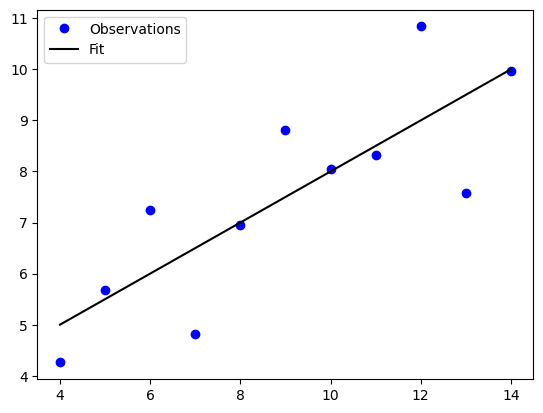

In [8]:
y_fit = fit_result.slope*x_1 + fit_result.intercept
plt.plot(x_1, y_1, "ob", label="Observations")
plt.plot(x_1, y_fit, "k", label="Fit")
plt.legend();

## Statsmodels

`statsmodels` is a third-party package (not in the Standard Libraray), included with the Anaconda Distribution. Hence, you don't need to install it in the default Anaconda environment (base).

**Why use `statsmodels`?**

`statsmodels` provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. It supports specifying models using R-style formulas and `pandas` DataFrames.

https://www.statsmodels.org/stable/index.html

In [9]:
from statsmodels.formula.api import ols  # OLS = Ordinary Least Squares

model_1 = ols("y ~ x", data=anscombe_1).fit()
model_1

`ols` returns an object that provides an extensive list of result statistics for each estimator.

In [10]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 27 Oct 2022   Prob (F-statistic):            0.00217
Time:                        17:51:06   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

C:\Users\salil.bavdekar\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


It's quite easy to access the required parameter as attributes of the `RegressionResultsWrapper` object.

In [11]:
# Try some attributes based on the table printed above.
# Use tab-completion to help find the relevant attribute.
model_1.params

Intercept    3.000091
x            0.500091
dtype: float64

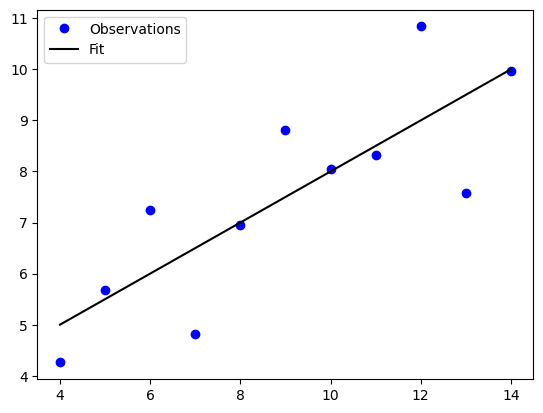

In [12]:
plt.plot(x_1, y_1, "ob", label="Observations")
plt.plot(x_1, model_1.fittedvalues, "k", label="Fit")
plt.legend();

### Comparison between the 4 fitting functions

**`scipy.optimize.curve_fit()`**

In [13]:
%%timeit

def linear_func(x, m, c):
    return m*x + c

popt_1, pcov_1 = optimize.curve_fit(linear_func, x_1, y_1, p0=(1, 1))

2.58 ms ± 243 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**`numpy.polyfit()`**

In [14]:
%%timeit

fit_result_np = np.polyfit(x_1, y_1, deg=1, full=True)

# Calculating R^2.
ss_res = fit_result_np[1][0]
y_mean = np.mean(y_1)
ss_tot = np.sum((y_1 - y_mean)**2)
r2 = 1 - (ss_res / ss_tot)

427 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**`scipy.stats.lingress()`**

In [15]:
%%timeit

fit_result = stats.linregress(x_1, y_1)
r2 = fit_result.rvalue**2

129 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**`statsmodels.formula.api.ols`**

In [16]:
%%timeit

model = ols("y ~ x", data=anscombe_1).fit()

3.85 ms ± 539 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Multiple Linear Regression

$y = c_0 + c_1 x_1 + c_2 x_2 + ...$

In [17]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


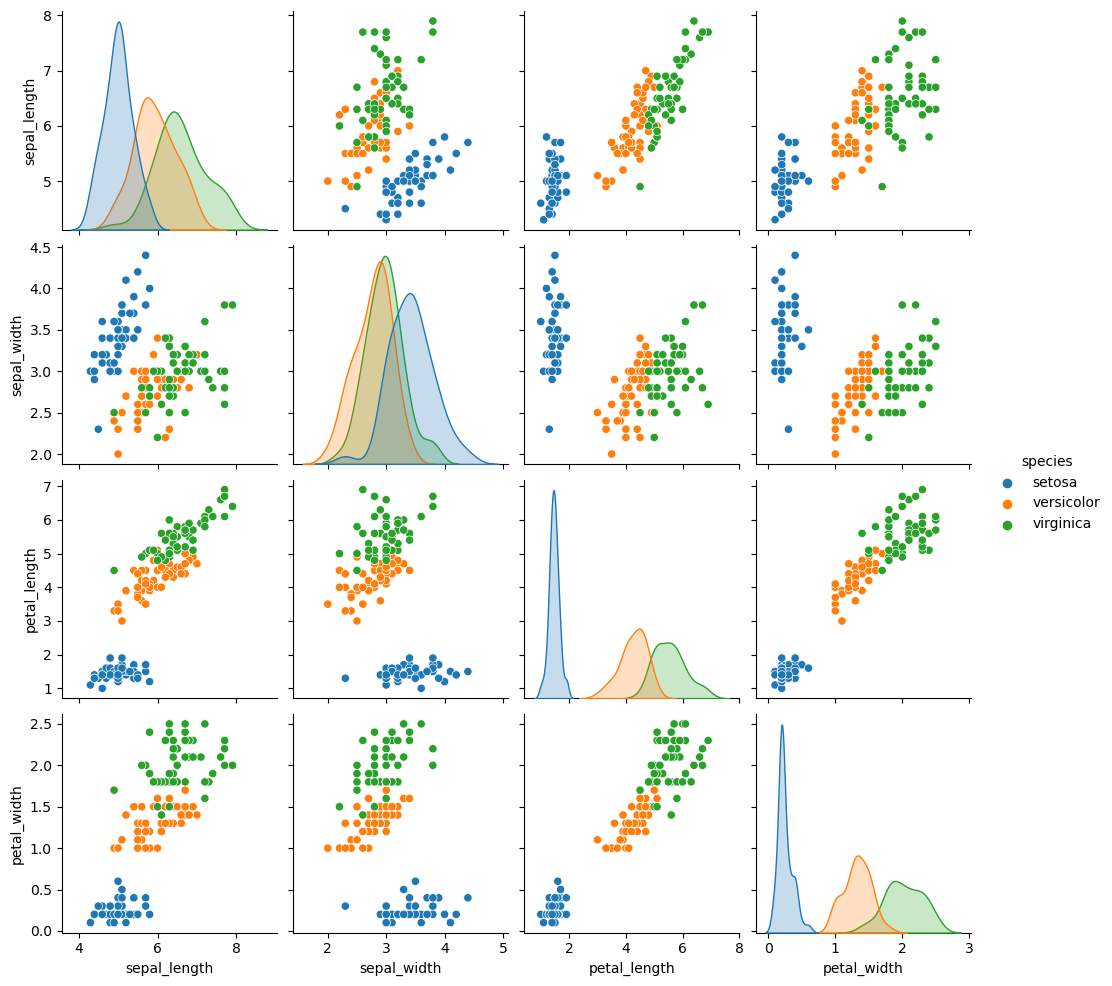

In [18]:
sns.pairplot(iris, hue="species");

**Let's first look at the `petal_width` and a function of `petal_length`.**

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           4.68e-86
Time:                        17:51:29   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3631      0.040     -9.131   

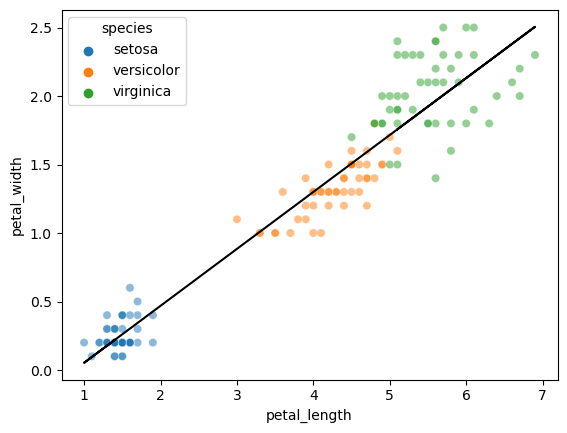

In [19]:
model_petal = ols("petal_width ~ petal_length", data=iris).fit()
print(model_petal.summary())

# Plot
ax = sns.scatterplot(x="petal_length", y="petal_width", hue="species", alpha=0.5, data=iris)
ax.plot(iris["petal_length"], model_petal.fittedvalues, "k");

Not bad!

**What about `sepal_length` and a function of `petal_length`?**

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.04e-47
Time:                        17:51:30   Log-Likelihood:                -77.020
No. Observations:                 150   AIC:                             158.0
Df Residuals:                     148   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.3066      0.078     54.939   

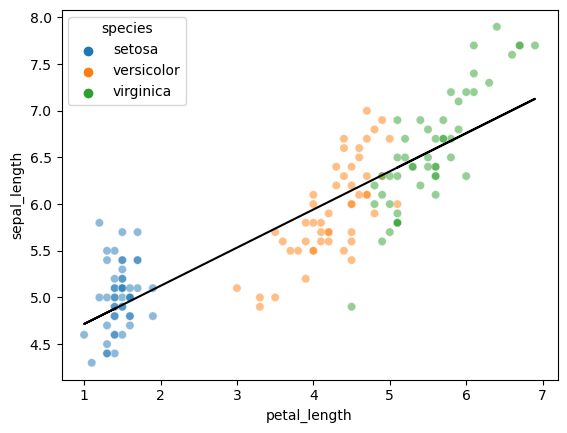

In [20]:
model_length = ols("sepal_length ~ petal_length", data=iris).fit()
print(model_length.summary())

# Plot
ax = sns.scatterplot(x="petal_length", y="sepal_length", hue="species", alpha=0.5, data=iris)
ax.plot(iris["petal_length"], model_length.fittedvalues, "k");

In this case, a single regression line does not really do the data justice, even if the R-squared value is reasonably high.

**We must include an additional factor, i.e., the species**

$$y = c_0 + c_1 x_1 + c_2 x_2$$

We also specify that `species` is a categorical variable. Hence, each of its different values (`setosa`, `versicolor`, and `virginica`) are treated as different entities using 'dummy' Boolean variables, $x_{vers}$ and $x_{virg}$, which can only have values of `0` or `1`. Let $p_i$ and $q_i$ be and the coefficients for $x_{vers}$ and $x_{virg}$, repectively. So our model now becomes:

$$y = c_0 + c_1 x_1 + p_0 x_{vers} + q_0 x_{virg}$$

| Species    | $x_{vers}$ | $x_{virg}$ |$\text{Intercept}$|$\text{Slope}$ |
|------------|------------|------------|------------------|---------------|
| Setosa     | $0$        | $0$        | $c_0$            | $c_1$         |
| Versicolor | $1$        | $0$        | $c_0 + p_0$      | $c_1$         |
| Virginica  | $0$        | $1$        | $c_0 + q_0$      | $c_1$         |

Using `sympy`, we can easily understand how we arrive at the table above:

In [21]:
y, x_1, x_vers, x_virg, c_0, c_1, p_0, p_1, q_0, q_1 = sym.symbols("y x_1 x_vers x_virg c_0 c_1 p_0 p_1 q_0 q_1")

expr_species = c_0 + c_1*x_1 + p_0*x_vers + q_0*x_virg
sym.Eq(y, expr_species)

Eq(y, c_0 + c_1*x_1 + p_0*x_vers + q_0*x_virg)

Setosa:

In [22]:
sym.Eq(y, expr_species.subs([(x_vers, 0), (x_virg, 0)]))

Eq(y, c_0 + c_1*x_1)

Versicolor

In [23]:
sym.Eq(y, expr_species.subs([(x_vers, 1), (x_virg, 0)]))

Eq(y, c_0 + c_1*x_1 + p_0)

Virginica

In [24]:
sym.Eq(y, expr_species.subs([(x_vers, 0), (x_virg, 1)]))

Eq(y, c_0 + c_1*x_1 + q_0)

We specify that a variable is categorical using the `C()` wrapper. It's not strictly required in this case, as variables with `str` values are autmoatically assumed to be categorical. But it required when `int` or `float` variables are categorical (e.g., when the represent levels).

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     249.4
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           3.10e-57
Time:                        17:51:30   Log-Likelihood:                -48.116
No. Observations:                 150   AIC:                             104.2
Df Residuals:                     146   BIC:                             116.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

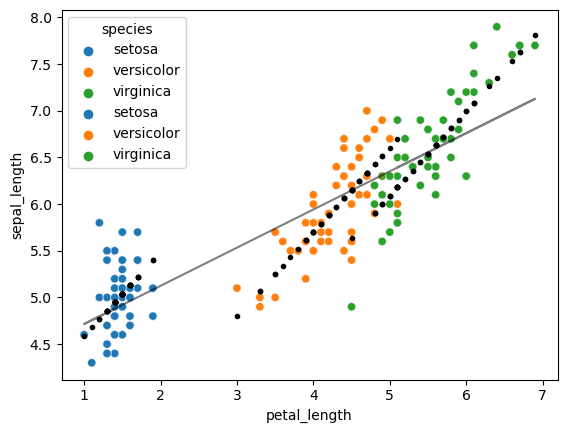

In [25]:
model_species = ols("sepal_length ~ petal_length + C(species)", data=iris).fit()
print(model_species.summary())

# Print slope and intercepts
print("")
print("========================")
print("Intercepts")
print("------------------------")
print(f"Setosa     : {model_species.params[0]:.4f}")
print(f"Versicolor : {model_species.params[0] + model_species.params[1]:.4f}")
print(f"Virginica  : {model_species.params[0] + model_species.params[2]:.4f}")
print("========================")
print(f"Slope      : {model_species.params[3]:.4f}")
print("========================")
("========================")
print("Fits")
print("------------------------")
print(f"Setosa     : y = {model_species.params[3]:.4f} x + {model_species.params[0]:.4f}")
print(f"Versicolor : y = {model_species.params[3]:.4f} x + {model_species.params[0] + model_species.params[1]:.4f}")
print(f"Virginica  : y = {model_species.params[3]:.4f} x + {model_species.params[0] + model_species.params[2]:.4f}")
print("========================")

# Plot model with species included
ax = sns.scatterplot(x="petal_length", y="sepal_length", hue="species", data=iris)
ax.plot(iris["petal_length"], model_species.fittedvalues, ".k");

# Plot model without species included
ax = sns.scatterplot(x="petal_length", y="sepal_length", hue="species", alpha=0.5, data=iris)
ax.plot(iris["petal_length"], model_length.fittedvalues, "k", alpha=0.5);

With this method, all three regression lines are parallel to each other, with the only difference being the value of the intercept.

Adding **interaction terms** makes the model less restrictive:

$$y = c_0 + c_1 x_1 + c_2 x_2 + c_{1,2} x_1 x_2$$

Without Boolean dummy variables:

$$y = c_0 + c_1 x_1 + p_0 x_{vers} + q_0 x_{virg} + p_1 (x_1 x_{vers}) + q_1 (x_1 x_{virg})$$

Once again, using `sympy`:

In [26]:
expr_interaction = c_0 + c_1*x_1 + p_0*x_vers + q_0*x_virg + p_1*(x_1*x_vers) + q_1*(x_1*x_virg)
sym.Eq(y, expr_interaction)

Eq(y, c_0 + c_1*x_1 + p_0*x_vers + p_1*x_1*x_vers + q_0*x_virg + q_1*x_1*x_virg)

Setosa:

In [27]:
sym.Eq(y, expr_interaction.subs([(x_vers, 0), (x_virg, 0)]))

Eq(y, c_0 + c_1*x_1)

Versicolor

In [28]:
sym.Eq(y, expr_interaction.subs([(x_vers, 1), (x_virg, 0)]).collect(x_1))

Eq(y, c_0 + p_0 + x_1*(c_1 + p_1))

Virginica

In [29]:
sym.Eq(y, expr_interaction.subs([(x_vers, 0), (x_virg, 1)]).collect(x_1))

Eq(y, c_0 + q_0 + x_1*(c_1 + q_1))

| Species    | $x_{vers}$ | $x_{virg}$ |$\text{Intercept}$|$\text{Slope}$ |
|------------|------------|------------|------------------|---------------|
| Setosa     | $0$        | $0$        | $c_0$            | $c_1$         |
| Versicolor | $1$        | $0$        | $c_0 + p_0$      | $c_1 + p_1$   |
| Virginica  | $0$        | $1$        | $c_0 + q_0$      | $c_1 + q_1$   |

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     151.7
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.48e-55
Time:                        17:51:31   Log-Likelihood:                -46.384
No. Observations:                 150   AIC:                             104.8
Df Residuals:                     144   BIC:                             122.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

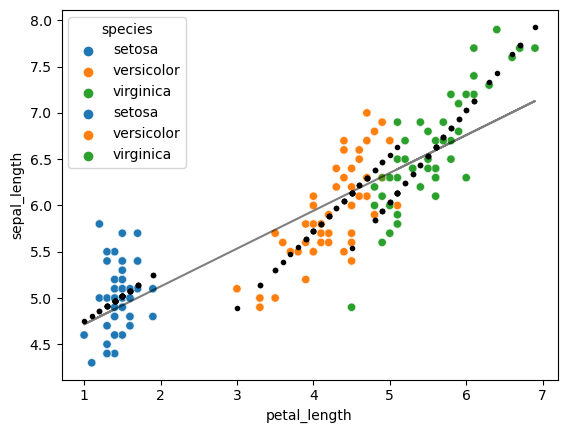

In [30]:
model_interaction = ols("sepal_length ~ petal_length + C(species) + petal_length*C(species)", data=iris).fit()
print(model_interaction.summary())

# Print slope and intercepts
print("")
print("========================")
print("Intercepts")
print("------------------------")
print(f"Setosa     : {model_interaction.params[0]:.4f}")
print(f"Versicolor : {model_interaction.params[0] + model_interaction.params[1]:.4f}")
print(f"Virginica  : {model_interaction.params[0] + model_interaction.params[2]:.4f}")
print("========================")
print(f"Slopes")
print("------------------------")
print(f"Setosa     : {model_interaction.params[3]:.4f}")
print(f"Versicolor : {model_interaction.params[3] + model_interaction.params[4]:.4f}")
print(f"Virginica  : {model_interaction.params[3] + model_interaction.params[5]:.4f}")
print("========================")
print("Fits")
print("------------------------")
print(f"Setosa     : y = {model_interaction.params[3]:.4f} x + {model_interaction.params[0]:.4f}")
print(f"Versicolor : y = {model_interaction.params[3] + model_interaction.params[4]:.4f} x + {model_interaction.params[0] + model_species.params[1]:.4f}")
print(f"Virginica  : y = {model_interaction.params[3] + model_interaction.params[5]:.4f} x + {model_interaction.params[0] + model_species.params[2]:.4f}")
print("========================")

# Plot model with species and interaction included
ax = sns.scatterplot(x="petal_length", y="sepal_length", hue="species", data=iris)
ax.plot(iris["petal_length"], model_interaction.fittedvalues, ".k");

# Plot model without species included
ax = sns.scatterplot(x="petal_length", y="sepal_length", hue="species", alpha=0.5, data=iris)
ax.plot(iris["petal_length"], model_length.fittedvalues, "k", alpha=0.5);

By default, `statsmodels` treats a categorical variable with $K$ possible values as $K-1$ ‘dummy’ Boolean variables (the last level being absorbed into the intercept term). This is almost always a good default choice - however, it is possible to specify different encodings for categorical variables: https://www.statsmodels.org/devel/contrasts.html

### Higher order regression

This is just a special case of multiple linear regression.

$y = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_3 + ...$

If $x_2 = x_1^2$, $x_3 = x_1^3$, ...

$y = c_0 + c_1 x_1 + c_2 x_1^2 + c_3 x_1^3 + ...$

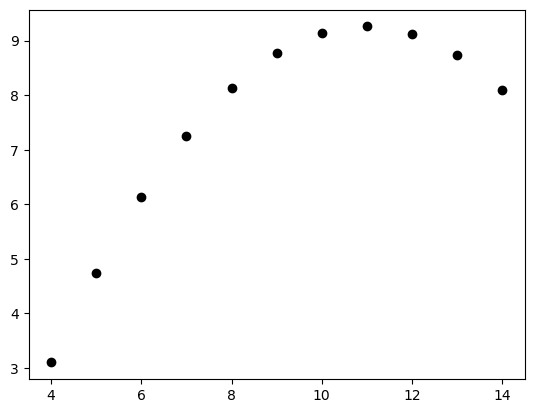

In [31]:
anscombe_2 = anscombe.copy()[anscombe["dataset"] == "II"]
anscombe_2.sort_values(by="x", inplace=True)
fig, ax = plt.subplots()
ax.plot(anscombe_2["x"], anscombe_2["y"], "ok");

**1st order polynomial (simple linear regression)**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Thu, 27 Oct 2022   Prob (F-statistic):            0.00218
Time:                        17:51:31   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.0

C:\Users\salil.bavdekar\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


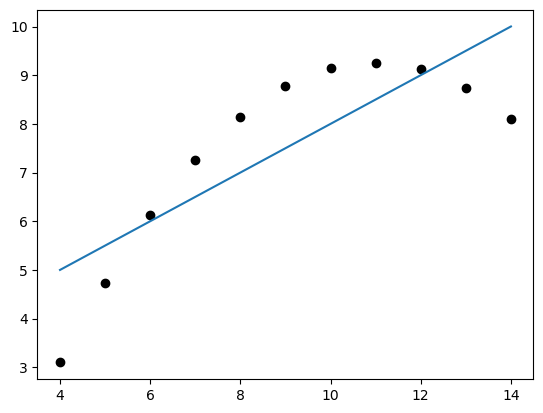

In [32]:
model_1 = ols("y ~ x", data=anscombe_2).fit()
print(model_1.summary())

# Plot
ax.plot(anscombe_2["x"], model_1.fittedvalues);
fig

**2nd order polynomial**

C:\Users\salil.bavdekar\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           8.64e-26
Time:                        17:51:32   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.0

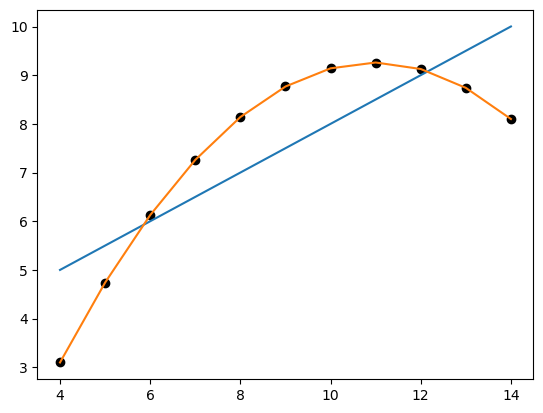

In [33]:
anscombe_2["x2"] = anscombe_2["x"].pow(2)
model_2 = ols("y ~ x + x2", data=anscombe_2).fit()
print(model_2.summary())

# Plot
ax.plot(anscombe_2["x"], model_2.fittedvalues);
fig

**3rd order polynomial**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.304e+06
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           2.73e-22
Time:                        17:51:32   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -104.9
Df Residuals:                       7   BIC:                            -103.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9957      0.014   -436.299      0.0

C:\Users\salil.bavdekar\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


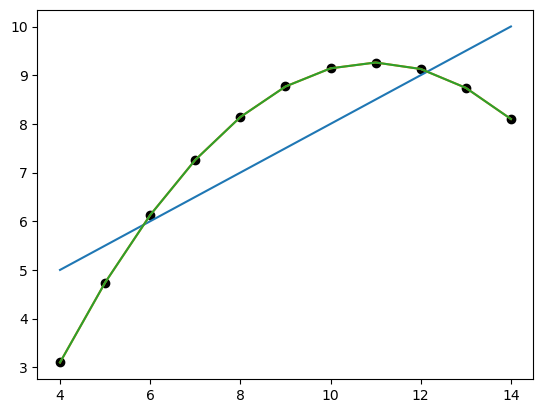

In [34]:
anscombe_2["x3"] = anscombe_2["x"].pow(3)
model_3 = ols("y ~ x + x2 + x3", data=anscombe_2).fit()
print(model_3.summary())

# Plot
ax.plot(anscombe_2["x"], model_3.fittedvalues);
fig

***Takeaway:* Don't blindly use higher order polynomials. Check the $p$-value of each added coefficient to see if it's actually useful in your new fit.**

If the $p$-value of a coefficient is above 0.05, remove the variable(s) it corresponds to and re-do the fit. If multiple coefficients have p-values above the threshold, remove the one corresponding to the highest p-value. Only add or remove one coefficient at a time!

The best option is to start with a lower number of coefficients/variables and add them in one by one and check their $p$-values each time.